## Data Visualization

In [2]:
# import relevant libraries 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [3]:
epl_standing = pd.read_csv("EPL Standings 2000-2022.csv") 

epl_standing.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]


In [4]:
epl_standing["Qualification or relegation"].unique()

array(['Qualification for the Champions League first group stage',
       'Qualification for the Champions League third qualifying round[a]',
       'Qualification for the UEFA Cup first round[a]', 'Not Applicable',
       'Qualification for the Intertoto Cup third round',
       'Relegation to the Football League First Division',
       'Qualification for the Champions League third qualifying round',
       'Qualification for the UEFA Cup first round[b]',
       'Qualification for the UEFA Cup first round[c]',
       'Qualification for the Intertoto Cup second round',
       'Qualification for the UEFA Cup qualifying round[a]Relegation to the Football League First Division',
       'Qualification for the Champions League group stage',
       'Qualification for the UEFA Cup qualifying round[c]',
       'Relegation to Football League First Division',
       'Qualification for the UEFA Cup first round',
       'Relegation to the Football League Championship',
       'Qualification for th

In [5]:
def qualification(row):
    if "Champions League"  in  row["Qualification or relegation"]:
        return "Champions League"
    elif  "UEFA"    in  row["Qualification or relegation"]:
        return "UEFA CUP"
    elif "Intertoto"  in row["Qualification or relegation"]:
        return "Intertoto Cup"
    elif "Europa League" in row["Qualification or relegation"]:
        return "Europa League"
    elif   "Conference League" in row["Qualification or relegation"]:
        return "Conference League"
    else:
         return "Relegated"
    
    
    return  row["Qualification or relegation"] 

epl_standing["Qualification"] = epl_standing.apply(qualification, axis=1)

In [6]:
epl_standing.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation,Qualification
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,Champions League
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,Champions League
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,Champions League
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],UEFA CUP
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],UEFA CUP


### Visualizing using Pandas 

**Bar Chat** 

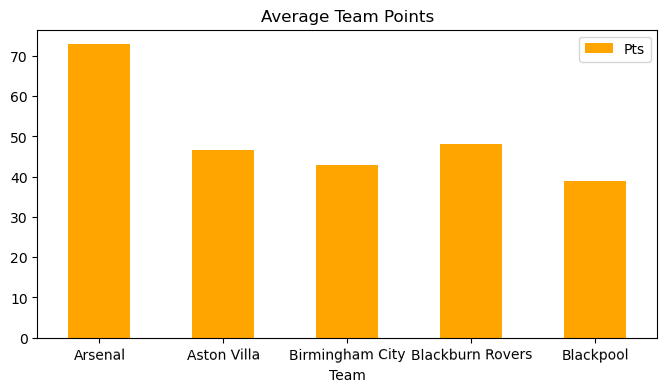

In [9]:
epl_standing.groupby("Team")[["Pts"]].mean().head().plot(kind="bar", figsize=(8,4), title="Average Team Points",color="orange", 
                                                         rot=0.5)
plt.show()

### Visualizing using Matplotlib

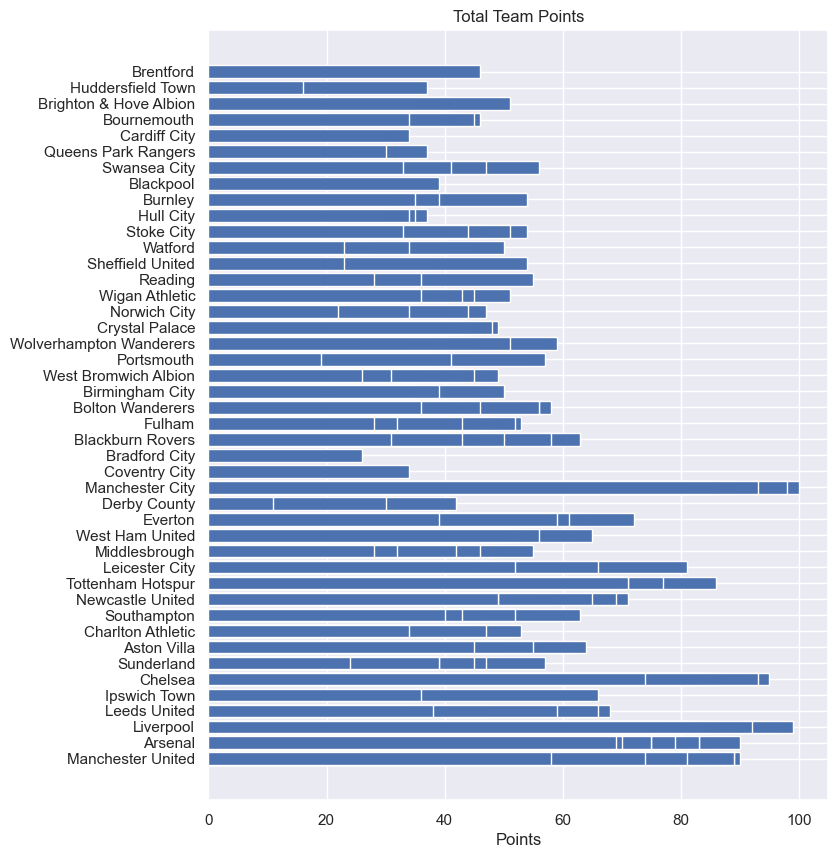

In [11]:
# visualize the total points for each team 
sns.set_theme()
plt.figure(figsize=(8,10))
plt.barh(y="Team", width="Pts", data=epl_standing)
plt.xlabel("Points")
plt.title("Total Team Points")
plt.show()

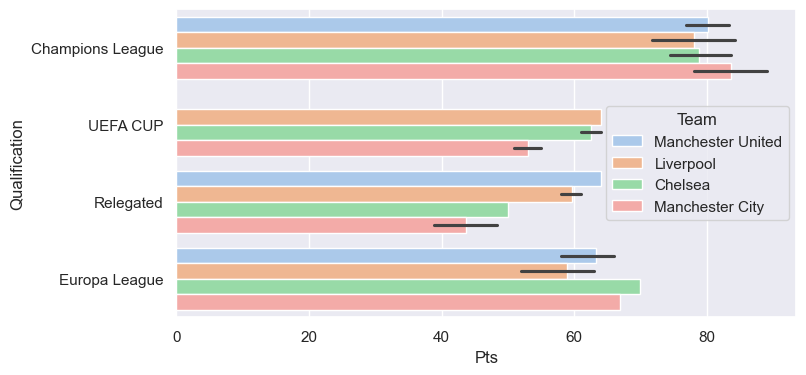

In [12]:
# bar chat using seaborn 
pop_5 = epl_standing[epl_standing["Team"].isin(["Chelsea", "Manchester United", "Liverpool", "Manchester City"])]
colors = ["ghostwhite","lavender","darkblue", "navy"]
plt.figure(figsize=(8,4))

sns.barplot(x="Pts", y="Qualification", hue="Team", data= pop_5, palette='pastel')

plt.show()

Pie chart

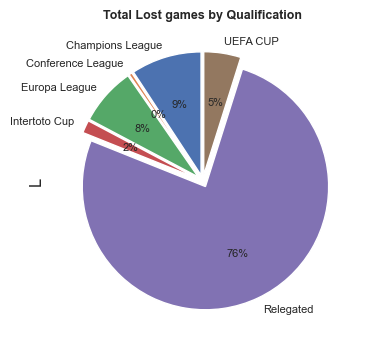

In [14]:
# Lost games 
explode  = (0.05, 0.05, 0.05, 0.05,0.05,0.05)
epl_standing.groupby("Qualification")["L"].sum().plot(kind="pie",autopct='%1.f%%',
                                                     explode=explode, startangle=90,
                                                     textprops={'fontsize':8}, figsize=(4,4))
plt.title("Total Lost games by Qualification", fontsize=9,fontweight="semibold" )
plt.show()

In [15]:
epl_standing["Season"].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
       '2018-19', '2019-20', '2020-21', '2021-22'], dtype=object)

line chart

In [17]:
sees = epl_standing.groupby("Season")["GF"].sum().reset_index()
sees["Season"] = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
                 2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

sees.head()

,Season,GF
0,2001,992
1,2002,1001
2,2003,1000
3,2004,1012
4,2005,975


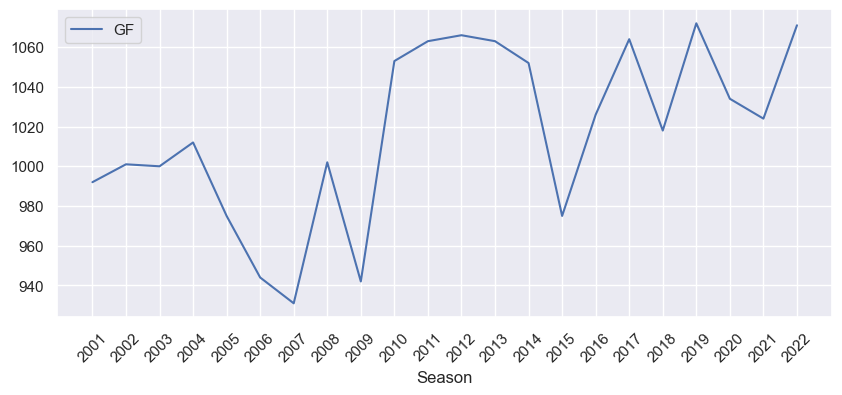

In [18]:
sees.plot(x="Season", y="GF", kind="line", figsize=(10,4), xticks= np.arange(2001,2023,1),
         rot=45)

plt.show()

In [19]:
epl_standing[['Qualification']].value_counts()

Qualification    
Relegated            275
Champions League      89
Europa League         41
UEFA CUP              25
Intertoto Cup          8
Conference League      2
Name: count, dtype: int64

In [20]:
total_points = epl_standing.groupby("Team")[["Pts"]].sum().sort_values(ascending=False, by = "Pts").head()
total_points

,Pts
Team,
Manchester United,1698
Chelsea,1665
Arsenal,1603
Liverpool,1591
Manchester City,1440


In [21]:
total_points = epl_standing.groupby("Team")[["Pts"]].sum().sort_values(ascending=False, by = "Pts").head()
total_points = total_points.reset_index()

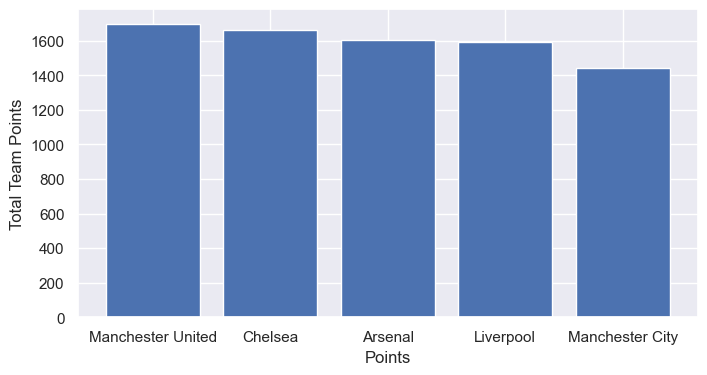

In [22]:
sns.set_theme()
plt.figure(figsize=(8,4))
plt.bar(x='Team', height='Pts',data=total_points)
plt.xlabel('Points')
plt.ylabel('Total Team Points')
plt.show()

### Visualizing using Seaborn

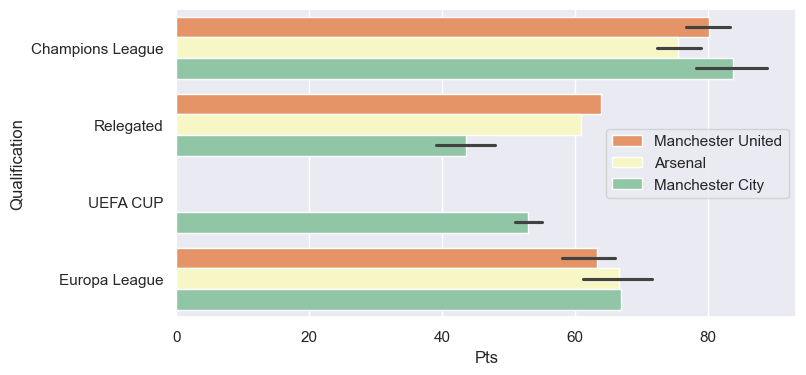

In [24]:
multiple_chart = epl_standing[epl_standing['Team'].isin(['Manchester United','Manchester City','Arsenal'])]

colors = ['ghostwhite','lavender','darkblue']
plt.figure(figsize =(8,4))
sns.barplot(x ='Pts', y ='Qualification',hue = 'Team',data = multiple_chart, palette = 'Spectral')
plt.legend(loc='best')
plt.show()

Lost games based on Qualification

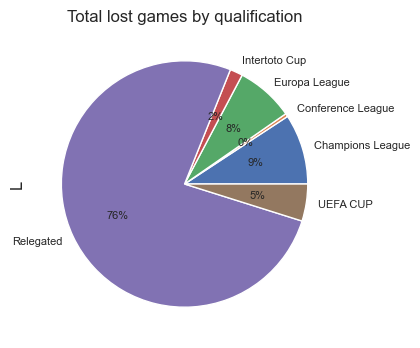

In [26]:
epl_standing.groupby('Qualification')['L'].sum().plot(kind='pie',textprops={'fontsize':8},autopct='%1.f%%',figsize=(4,4))
plt.title('Total lost games by qualification')
plt.show()

Line Chart

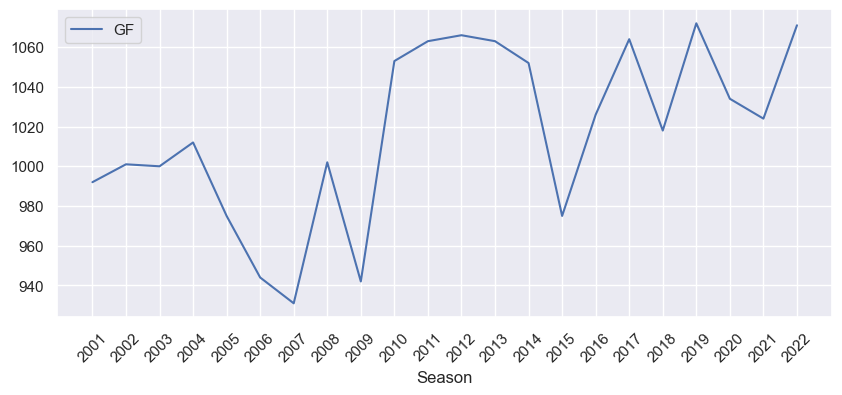

In [28]:
goals_scored = epl_standing.groupby("Season")["GF"].sum().reset_index()
goals_scored['Season'] = list(range(2001,2023))
goals_scored.plot(x='Season',y='GF',figsize=(10,4),xticks=np.arange(2001,2023,1),rot=45)
plt.show()

Multiple Line Chart
compare Manchester United Wins Arsenal Wins over the years

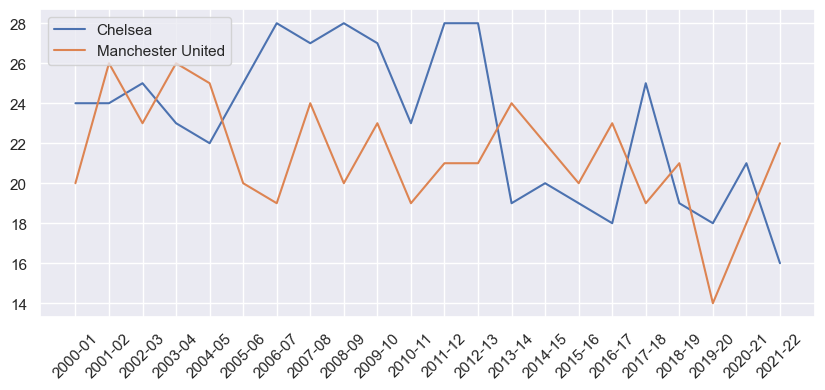

In [30]:
manchester = epl_standing[epl_standing['Team'] == 'Manchester United']
arsenal = epl_standing[epl_standing['Team'] == 'Arsenal']
plt.figure(figsize=(10,4))
plt.plot(manchester['Season'],manchester['W'])
plt.plot(arsenal['Season'],arsenal['W'])
plt.xticks(rotation=45)
plt.legend(labels=['Chelsea','Manchester United'],loc='upper left')
plt.show()

In [31]:
epl_standing[epl_standing['W']==24]

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation,Qualification
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,Champions League
21,2001-02,2,Liverpool,38,24,8,6,67,30,37,80,Qualification for the Champions League first g...,Champions League
22,2001-02,3,Manchester United,38,24,5,9,87,45,42,77,Qualification for the Champions League third q...,Champions League
61,2003-04,2,Chelsea,38,24,7,7,67,30,37,79,Qualification for the Champions League group s...,Champions League
121,2006-07,2,Chelsea,38,24,11,3,64,24,40,83,Qualification for the Champions League group s...,Champions League
142,2007-08,3,Arsenal,38,24,11,3,74,31,43,83,Qualification for the Champions League third q...,Champions League
263,2013-14,4,Arsenal,38,24,7,7,68,41,27,79,Qualification for the Champions League play-of...,Champions League
281,2014-15,2,Manchester City,38,24,7,7,83,38,45,79,Qualification for the Champions League group s...,Champions League


Scatter Plot
Relationship between the wins and total points accumulated chelsea

<function matplotlib.pyplot.show(close=None, block=None)>

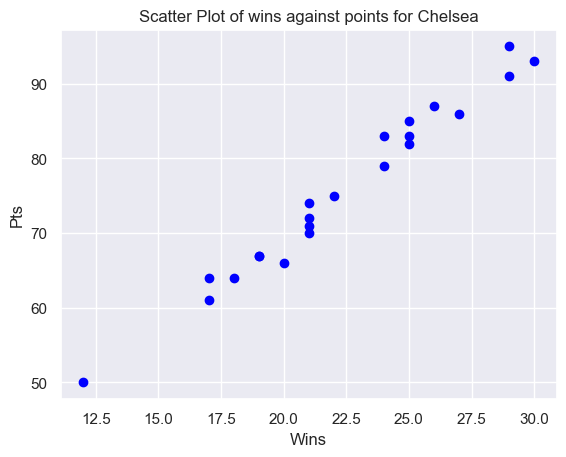

In [33]:
chelsea = epl_standing[epl_standing['Team']=='Chelsea']
chelsea
sns.set_theme()
plt.scatter(chelsea['W'],chelsea['Pts'],color='blue')
plt.title('Scatter Plot of wins against points for Chelsea')
plt.xlabel('Wins')
plt.ylabel('Pts')
plt.show

Distribution of goals scored and goals conceded

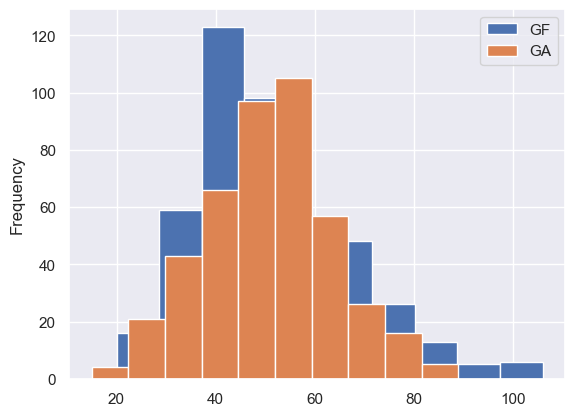

In [35]:
epl_standing['GF'].plot(kind='hist')
epl_standing['GA'].plot(kind='hist')
plt.legend(labels=['GF','GA'])
plt.show()